In [4]:
import os
import sys
import csv
import logging
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
import seaborn as sns

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..',))
sys.path.append(repo_root)

from src import *

In [5]:
process_directory(os.getcwd(), 'ex02.1')
process_directory(os.getcwd(), 'ex02.2')
process_directory(os.getcwd(), 'ex02.3')

In [6]:
def group_results_df(averages_df, compared_col, title, binary=False):
    means = calculate_column_means_against_base(averages_df, compared_col)
    if title == 'RMS':
        prop = calculate_percentages_against_base(averages_df, compared_col, flipped=True)
    else:
        prop = calculate_percentages_against_base(averages_df, compared_col)

    means.update({'title': title, 'metric': 'mean'})
    prop.update({'title': title, 'metric': 'proportion'})
    
    return means, prop

    
def plot_distributions(ax, df, title, compared_col):

    colormap = plt.colormaps.get_cmap('plasma')
    colors = colormap(np.linspace(0, 1, len(df.columns) - 1))

    for i,column in enumerate(df.columns):
        if 'Unnamed' not in column and column != 'rep' and column != 'Game' and column != compared_col:
            sns.kdeplot((df[column]-df[compared_col]), ax=ax, label=column, color=colors[i-1])
    
    ax.set_title(f'{title} Distributions')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()

def visualize_results(base_path, compared_col, binary=False):
    # Read the summary CSV files
    log_likelihood_df = pd.read_csv(os.path.join(base_path, 'log_likelihood_summary.csv'))
    leadership_log_likelihood_df = pd.read_csv(os.path.join(base_path, 'leadership_log_likelihood_summary.csv'))
    rms_df = pd.read_csv(os.path.join(base_path, 'rms_summary.csv'))
    rho_df = pd.read_csv(os.path.join(base_path, 'rho_summary.csv'))
    tau_df = pd.read_csv(os.path.join(base_path, 'tau_summary.csv'))

    # List of dataframes and their titles
    dataframes = [
        (log_likelihood_df, 'Log Likelihood'),
        (leadership_log_likelihood_df, 'Leadership Log Likelihood'),
        (rms_df, 'RMS'),
        (rho_df, 'Rho'),
        (tau_df, 'Tau')
    ]

    fig, axes = plt.subplots(1, 5, figsize=(50, 12), sharex=True)
    axes = axes.flatten()


    results = []
    for i, (df, title) in enumerate(dataframes):
        if binary:
            df = df[['Spring_Rank', 'Page_Rank', 'Point_Wise', 'BT']]
        means, prop = group_results_df(df, compared_col, title, binary)
        plot_distributions(axes[i], df, title, compared_col)
        results.extend([means, prop])

    # Convert results to a DataFrame for better visualization
    results_df = pd.DataFrame(results).T
 
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)
    print(results_df)
        

    plt.tight_layout()
    plt.show()


# Standard 

                          0               1                          2  \
Spring_Rank        -0.10576             0.0                   -0.10576   
Page_Rank         -0.632201             0.0                  -0.632201   
Point_Wise        -0.159804             0.0                  -0.159804   
title        Log Likelihood  Log Likelihood  Leadership Log Likelihood   
metric                 mean      proportion                       mean   

                                     3         4           5         6  \
Spring_Rank                        0.0  0.756831         0.0 -0.025488   
Page_Rank                          0.0   1.65771         0.0 -1.724763   
Point_Wise                         0.0  0.897262         0.0 -0.025161   
title        Leadership Log Likelihood       RMS         RMS       Rho   
metric                      proportion      mean  proportion      mean   

                      7         8           9  
Spring_Rank         0.0 -0.025488         0.0  
Page_Rank     

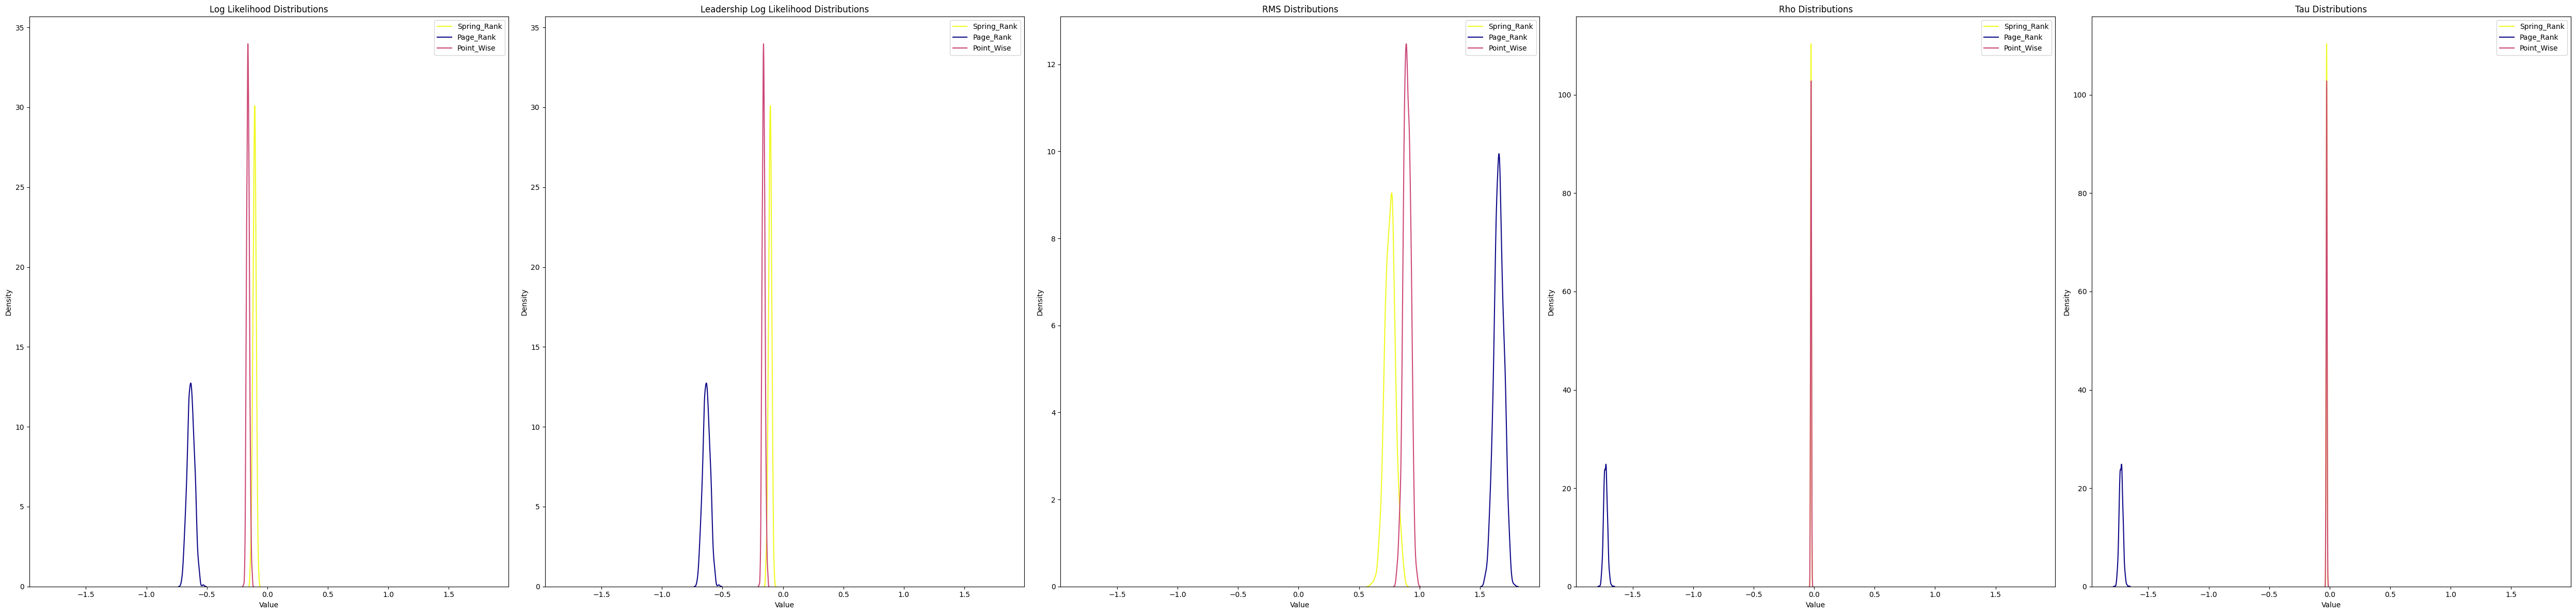

In [7]:
path = os.path.join(os.getcwd(), 'results', 'ex02.1')
visualize_results(path, compared_col='BT', binary=True)

# Higher Order 

                                     0               1  \
BT                           -0.007766           0.004   
BT_leadership                -0.295272             0.0   
HOL_BT                       -0.220808             0.0   
Spring_Rank                  -0.739137             0.0   
Spring_Rank_Leadership       -0.586262             0.0   
Page_Rank                    -3.873841             0.0   
Page_Rank_Leadership         -2.286697             0.0   
Point_Wise                   -0.877367             0.0   
title                   Log Likelihood  Log Likelihood   
metric                            mean      proportion   

                                                2                          3  \
BT                                      -0.001372                      0.159   
BT_leadership                           -0.045449                        0.0   
HOL_BT                                  -0.036513                        0.0   
Spring_Rank                             -

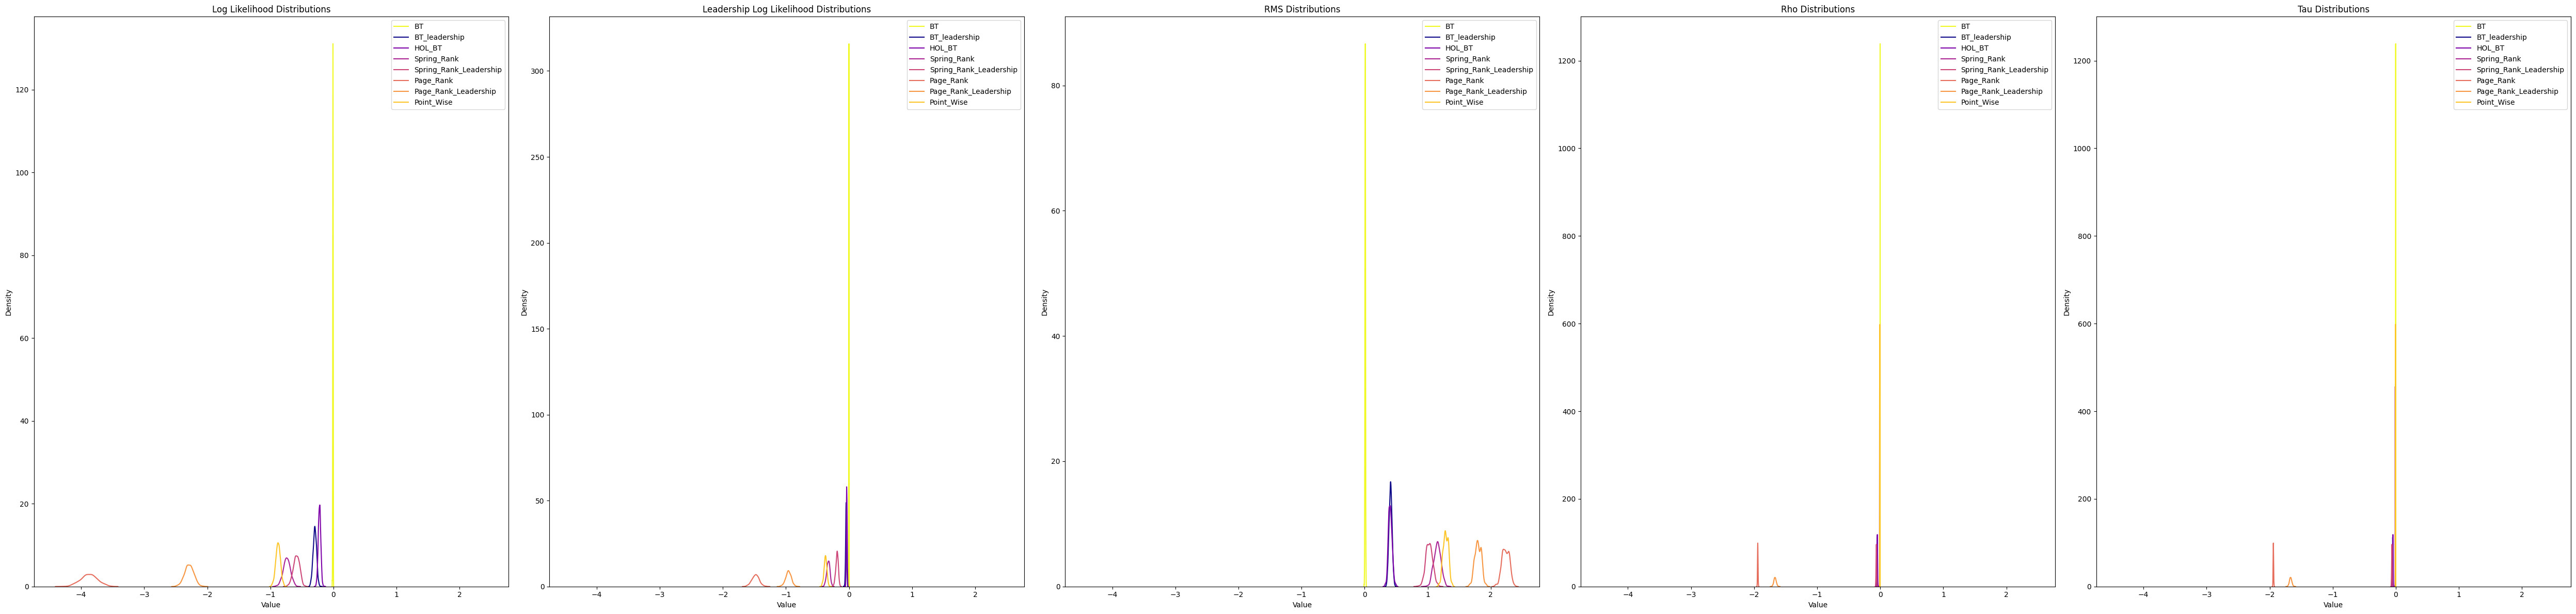

In [8]:
path = os.path.join(os.getcwd(), 'results', 'ex02.2')
visualize_results(path, compared_col='HO_BT')

# Higher Order Leadership

                                     0               1  \
BT                            0.876534             1.0   
BT_leadership                -0.492723             0.0   
HO_BT                          0.88833             1.0   
Spring_Rank                   0.725658             1.0   
Spring_Rank_Leadership        0.652142             1.0   
Page_Rank                     0.277133             1.0   
Page_Rank_Leadership          0.244391             1.0   
Point_Wise                    0.811011             1.0   
title                   Log Likelihood  Log Likelihood   
metric                            mean      proportion   

                                                2                          3  \
BT                                      -0.153586                        0.0   
BT_leadership                           -0.009119                      0.003   
HO_BT                                   -0.199379                        0.0   
Spring_Rank                             -

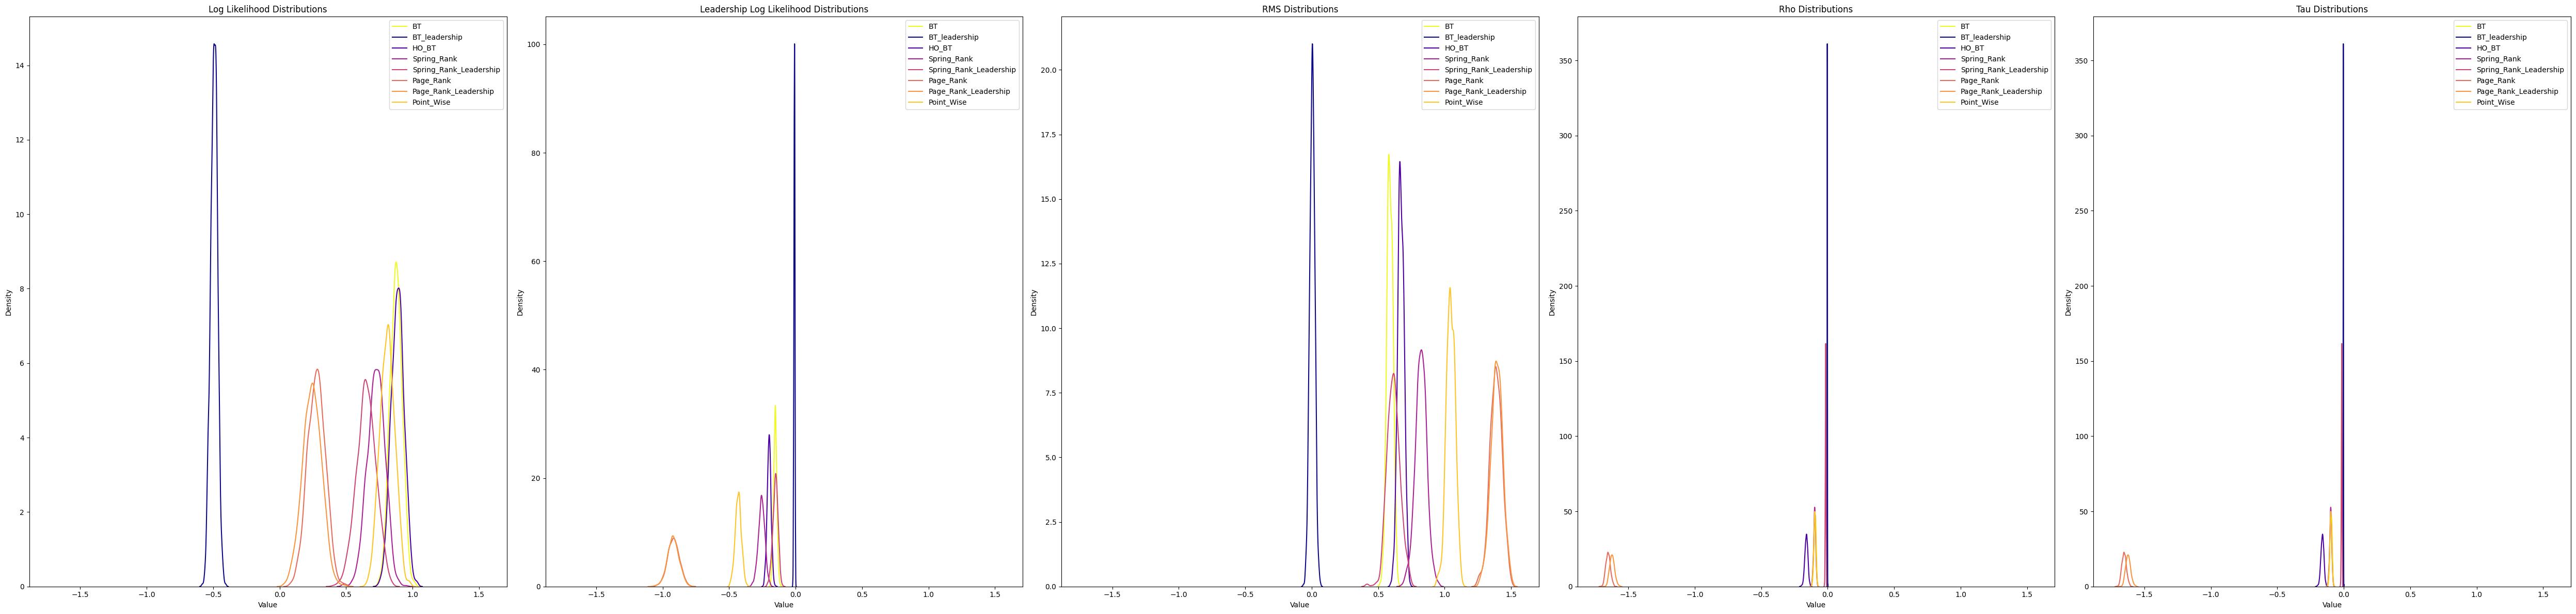

In [9]:
path = os.path.join(os.getcwd(), 'results', 'ex02.3')
visualize_results(path, compared_col='HOL_BT')